In [2]:
!pip install spacy

     |████████████████████████████████| 10.5 MB 4.9 MB/s eta 0:00:01    |██▉                             | 942 kB 409 kB/s eta 0:00:24
     |████████████████████████████████| 4.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 3.4 MB/s eta 0:00:01


In [49]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #표제어를 추출하는 기능
import nltk.data
import chardet #문자열 인코딩 인식
import re #정규화모듈
import os
import json
from pathlib import Path #파일시스템 경로를 객체로 다룸 그런데 파이썬 3.4~ 이후에는 기본 모듈로 포함
import spacy #텍스트 전처리에 끝내주는 라이브러리!!! ㅎ 특히 문장에서 entity recognizer로 마커펜 시각화 효과 짱! 참고:https://spacy.io/
import pandas as pd
import nltk.data

In [5]:
!pip install tabulate

In [50]:
os.listdir()

['.DS_Store',
 'images',
 'sub_verb.csv',
 'trained_model',
 'code',
 'README.md',
 '.gitignore',
 'Characters_directory',
 '.ipynb_checkpoints',
 'text_data',
 'final_data',
 'extract_name_as_subject_codetest.ipynb']

In [51]:
import en_core_web_lg
nlp = en_core_web_lg.load()


from collections import Counter
import spacy
from tabulate import tabulate
#nlp = spacy.load('en_core_web_lg')
import nltk
from nltk.tokenize import sent_tokenize

In [52]:
# main function for generating pre-treated data 
def main():
    dir = "text_data/"
    raw_text_data = read_file(dir) # 디렉토리에서 모든 파일을 익는다.
    valid_data = pre_processing(raw_text_data) # text data를 전처리하여  딕셔너리에 담는다.
    return valid_data

In [53]:
#print(valid_data) #용량초과로 안보이네. 설정변경하라는데 그냥 넘어가장

In [54]:
# read file # same as siyang's code   여길 참조했음: https://github.com/isthatyoung/NLP-Characters-Relationships
def read_file(dir):
    json_file = Path('{}Raw-Harry-Potter-Series.json'.format(dir)) #제이슨 파일을 불러온다. 
    book = {} #딕셔너리를 만들고
    if not json_file.exists(): #제이슨 파일이 없으면
        files = [] #리스트를 만들고
        pattern = '\.txt' #요게 패턴이고
        for readfile in os.listdir(dir): #디렉토리를 안에 있는 파일을 하나씩 불러와서리
            if re.search(pattern, readfile): #패턴으로 정규화해서 
                files.append(readfile) # 저장하지
        pattern = '(.+)\..+$' #그리고 또 다른 패턴인데
        for file_name in files: #요것도 반복
            decode_text = [] #리스트를 만들고
            with open(dir + file_name, 'rb') as f_read: #디렉토리의 파일네임을 열어서리
                text = f_read.readlines() #한줄씩 읽어서
                for line in text: #또 반복
                    type = chardet.detect(line) # 이건 cahrdet로 문자열을 인식해서리 type로 전달하고
                    line = line.decode(type["encoding"]) # 인코딩 티입으로 디코드해서 라인으로 전달하고
                    decode_text.append(line) #결과값 라인을 디코드에 합치는 전체적인 디코드과정
                file_name = re.findall(pattern, file_name)[0] #패턴을 ㅏㅈ아서
                book[file_name] = decode_text #결과값을 리스트에 담고
            f_read.close() # 파일 읽는 것을끝냄

        ##TODO:Save book to json file
        with open(dir + 'Raw-Harry-Potter-Series.json', 'a') as outfile: #json파일을 생성하지
            json.dump(book, outfile, ensure_ascii=False)
            outfile.write('\n')
    else: #json 파일이 있다면 그냥 열어서 
        readfile = open('{}Raw-Harry-Potter-Series.json'.format(dir),"r")
        book = eval(readfile.read()) #읽은 값을 그대로 book에 전달하고 
    return book #요로케 book 파일을 만든다. 

In [55]:
# data processing: 입력 텍스트들이 문장으로 토큰화해야 함. sentence
def pre_processing(data):
    
    data_into_sentences = {} #데이터를 문장으로 담을 딕셔너리를 만들고, 딕셔너리는 키와 값이 필요하니까.
    
    for key in data.keys(): #데이터의 키들을 가져와서 책의 텍스트로 각각 담고
        text_of_book = data[key]
       
        pattern = r'^[¡]*' #패턴은 다음과 같다.
        
        all_paragraph = [] #패러그라프의 리스트를 만들고 다시 반복
        for para in text_of_book:
            para = para.strip('\n') #공백제거인데, 여기서는 줄발꿈을 제거해준다.
            para = re.sub(pattern, '', para) #패턴을 모두 빈칸으로 바꾸는 정규화처리
            all_paragraph.append(para) #para에 추가한다.
        
        all_sentence = [] #문장을 담을 리스트를 만들고 다시 반복
        for i in all_paragraph:
            for j in sent_tokenize(i):
                all_sentence.append(j)

        data_into_sentences[key] = all_sentence #리스트에 담긴 모든 토큰화된 문장을 담아서 딕셔너리를 만든다.


    return data_into_sentences

In [56]:
# Run main function and generate valid data
valid_data = main()

In [57]:
# See what valid_data looks like and check whether there is problem
print(valid_data.keys())

dict_keys(['Harry Potter and the Deathly Hallows', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Sorcerer Stone', 'Harry Potter and The Half-Blood Prince', 'Harry Potter and The Chamber Of Secrets', 'Harry Potter and the Goblet of Fire'])


In [58]:
print(valid_data['Harry Potter and the Sorcerer Stone'][0])

CHAPTER ONE


In [59]:
print(valid_data['Harry Potter and the Sorcerer Stone'][1])

THE BOY WHO LIVED


In [60]:
print(valid_data['Harry Potter and the Sorcerer Stone'][2])

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.


In [61]:
print(valid_data['Harry Potter and the Sorcerer Stone'][3])

They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.


In [62]:
# Make the valid_data into content_json format as required # almost same as Janine's code
content_json = []
location = 0 # 리스트로 처리된 데이터를 읽어서 
#book1
for sentence in valid_data['Harry Potter and the Sorcerer Stone']:
    location = location + 1
    chunk = {"book_id":1}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book2
for sentence in valid_data['Harry Potter and The Chamber Of Secrets']:
    location = location + 1
    chunk = {"book_id":2}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book3
for sentence in valid_data['Harry Potter and the Prisoner of Azkaban']:
    location = location + 1
    chunk = {"book_id":3}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book4
for sentence in valid_data['Harry Potter and the Goblet of Fire']:
    location = location + 1
    chunk = {"book_id":4}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book5
for sentence in valid_data['Harry Potter and the Order of the Phoenix']:
    location = location + 1
    chunk = {"book_id":5}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book6
for sentence in valid_data['Harry Potter and The Half-Blood Prince']:
    location = location + 1
    chunk = {"book_id":6}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)
#book7
for sentence in valid_data['Harry Potter and the Deathly Hallows']:
    location = location + 1
    chunk = {"book_id":7}
    chunk["text"] = sentence
    chunk["location"] = location
    content_json.append(chunk)

In [69]:
# See what the content_json looks like
print(type(content_json))
print('---')
print(content_json[:4]) #이렇게 아이디, 텍스트, 위치가 쫙 리스트에 담긴다.

<class 'list'>
---
[{'book_id': 1, 'text': 'CHAPTER ONE', 'location': 1}, {'book_id': 1, 'text': 'THE BOY WHO LIVED', 'location': 2}, {'book_id': 1, 'text': 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.', 'location': 3}, {'book_id': 1, 'text': "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.", 'location': 4}]


In [70]:
book_locations = (pd.DataFrame(content_json)
                  .reset_index()
                  .groupby('book_id')['index']
                  .min() #최소값을 구하고
                  .to_dict() #데이터 프레임을 딕셔너리로 바꿔서리
                 )
book_locations

{1: 0, 2: 6765, 3: 14598, 4: 23970, 5: 42275, 6: 66083, 7: 80474}

In [71]:
len(content_json) #json 파일이 얼마나 되는지 확인

97211

In [72]:
# Create final_data for next step, namely find subject, verb, and object
final_data = []
for i in range(len(content_json)):
    final_data.append(content_json[i]["text"]) #final_data에 i 번째의 text를 슬라이씽해서리 계속 합치라는 거임

In [74]:
# See what the final_data looks like
print(final_data[:5]) #이렇게 보임

['CHAPTER ONE', 'THE BOY WHO LIVED', 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.', "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.", 'Mr. Dursley was the director of a firm called Grunnings, which made drills.']


In [78]:
#extract all the name entities shown as the subject in the sentence

sub_verb_obj = []

def token_is_subject_with_action(token):
    nsubj = token.dep_ == 'nsubj' #이건 norminal subject로 주어라고 보면 됨. 그런데 주어와 연결되는 개념을 의존구분을 추출분석하여 표현해주는거임
    head_verb = token.head.pos_ == 'VERB'
    person = token.ent_type_ == 'PERSON'
    return nsubj and head_verb and person




for i in range(len(final_data)):
    doc = nlp(final_data[i])
    helper_nsubj = 0 
    
    for token in doc:
        if token_is_subject_with_action(token):
            helper_nsubj += 1
            token_nsubj = token


    
    if helper_nsubj==1:    
        span = doc[token_nsubj.head.left_edge.i:token_nsubj.head.right_edge.i+1]
        data = dict(
                    name = token_nsubj.orth_,
                    span = span.text,
                    verb = token_nsubj.head.lower_,
                    location = i
                    )

        sub_verb_obj.append(data)
            

print(len(sub_verb_obj)) 



KeyboardInterrupt: 

In [ ]:
sub_verb_obj[:4]

In [32]:
sub_berv_obj= pd.DataFrame(sub_verb_obj)
sub_berv_obj.to_csv('sub_verb.csv')

In [33]:
# See what the result looks like
print(sub_verb_obj[0])

{'name': 'Dursley', 'span': "Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years; in fact, Mrs. Dursley pretended she didn't have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be.", 'verb': 'pretended', 'location': 10}


In [34]:
print(sub_verb_obj[15])

{'name': 'Dursley', 'span': 'said Mr. Dursley loudly.', 'verb': 'said', 'location': 86}


In [35]:
print(sub_verb_obj[1]) # 이렇게 이름, span(이건 name과 verb의 사이에 오는 문자를 표시), 동사가 잘 정리됨

{'name': 'Dursleys', 'span': 'The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street.', 'verb': 'shuddered', 'location': 11}


In [36]:


action_df = pd.DataFrame(sub_verb_obj) #이제야 데이터프레임으로 정리다 되고

print('Unique Names:', action_df['name'].nunique()) #유니크한 값 => 이름을 모두 추출해보면... 반복적인것은 카운트하지 않고 개수를 셈


#요건 정리하는 거임(데이터프레임의 내용을)
most_common = (action_df
    .groupby(['name', 'verb'])
    .size()
    .groupby(level=0, group_keys=False)
    .nlargest(1)
    .rename('Count')
    .reset_index(level=1)
    .rename(columns={
        'verb': 'Most Common'
    })
)




Unique Names: 545


In [37]:
most_common.sort_values('Count', ascending=False).head(10) #카운트 가장 많이된것, 많이 등장하는 것 순서대로

,Most Common,Count
name,,
Harry,said,2565
Ron,said,1381
Hermione,said,1106
Dumbledore,said,597
Hagrid,said,335
Weasley,said,332
Fred,said,219
Lupin,said,210
Snape,said,203


In [39]:
!pip install seaborn

     |████████████████████████████████| 215 kB 252 kB/s eta 0:00:01


showing order before name combination
 


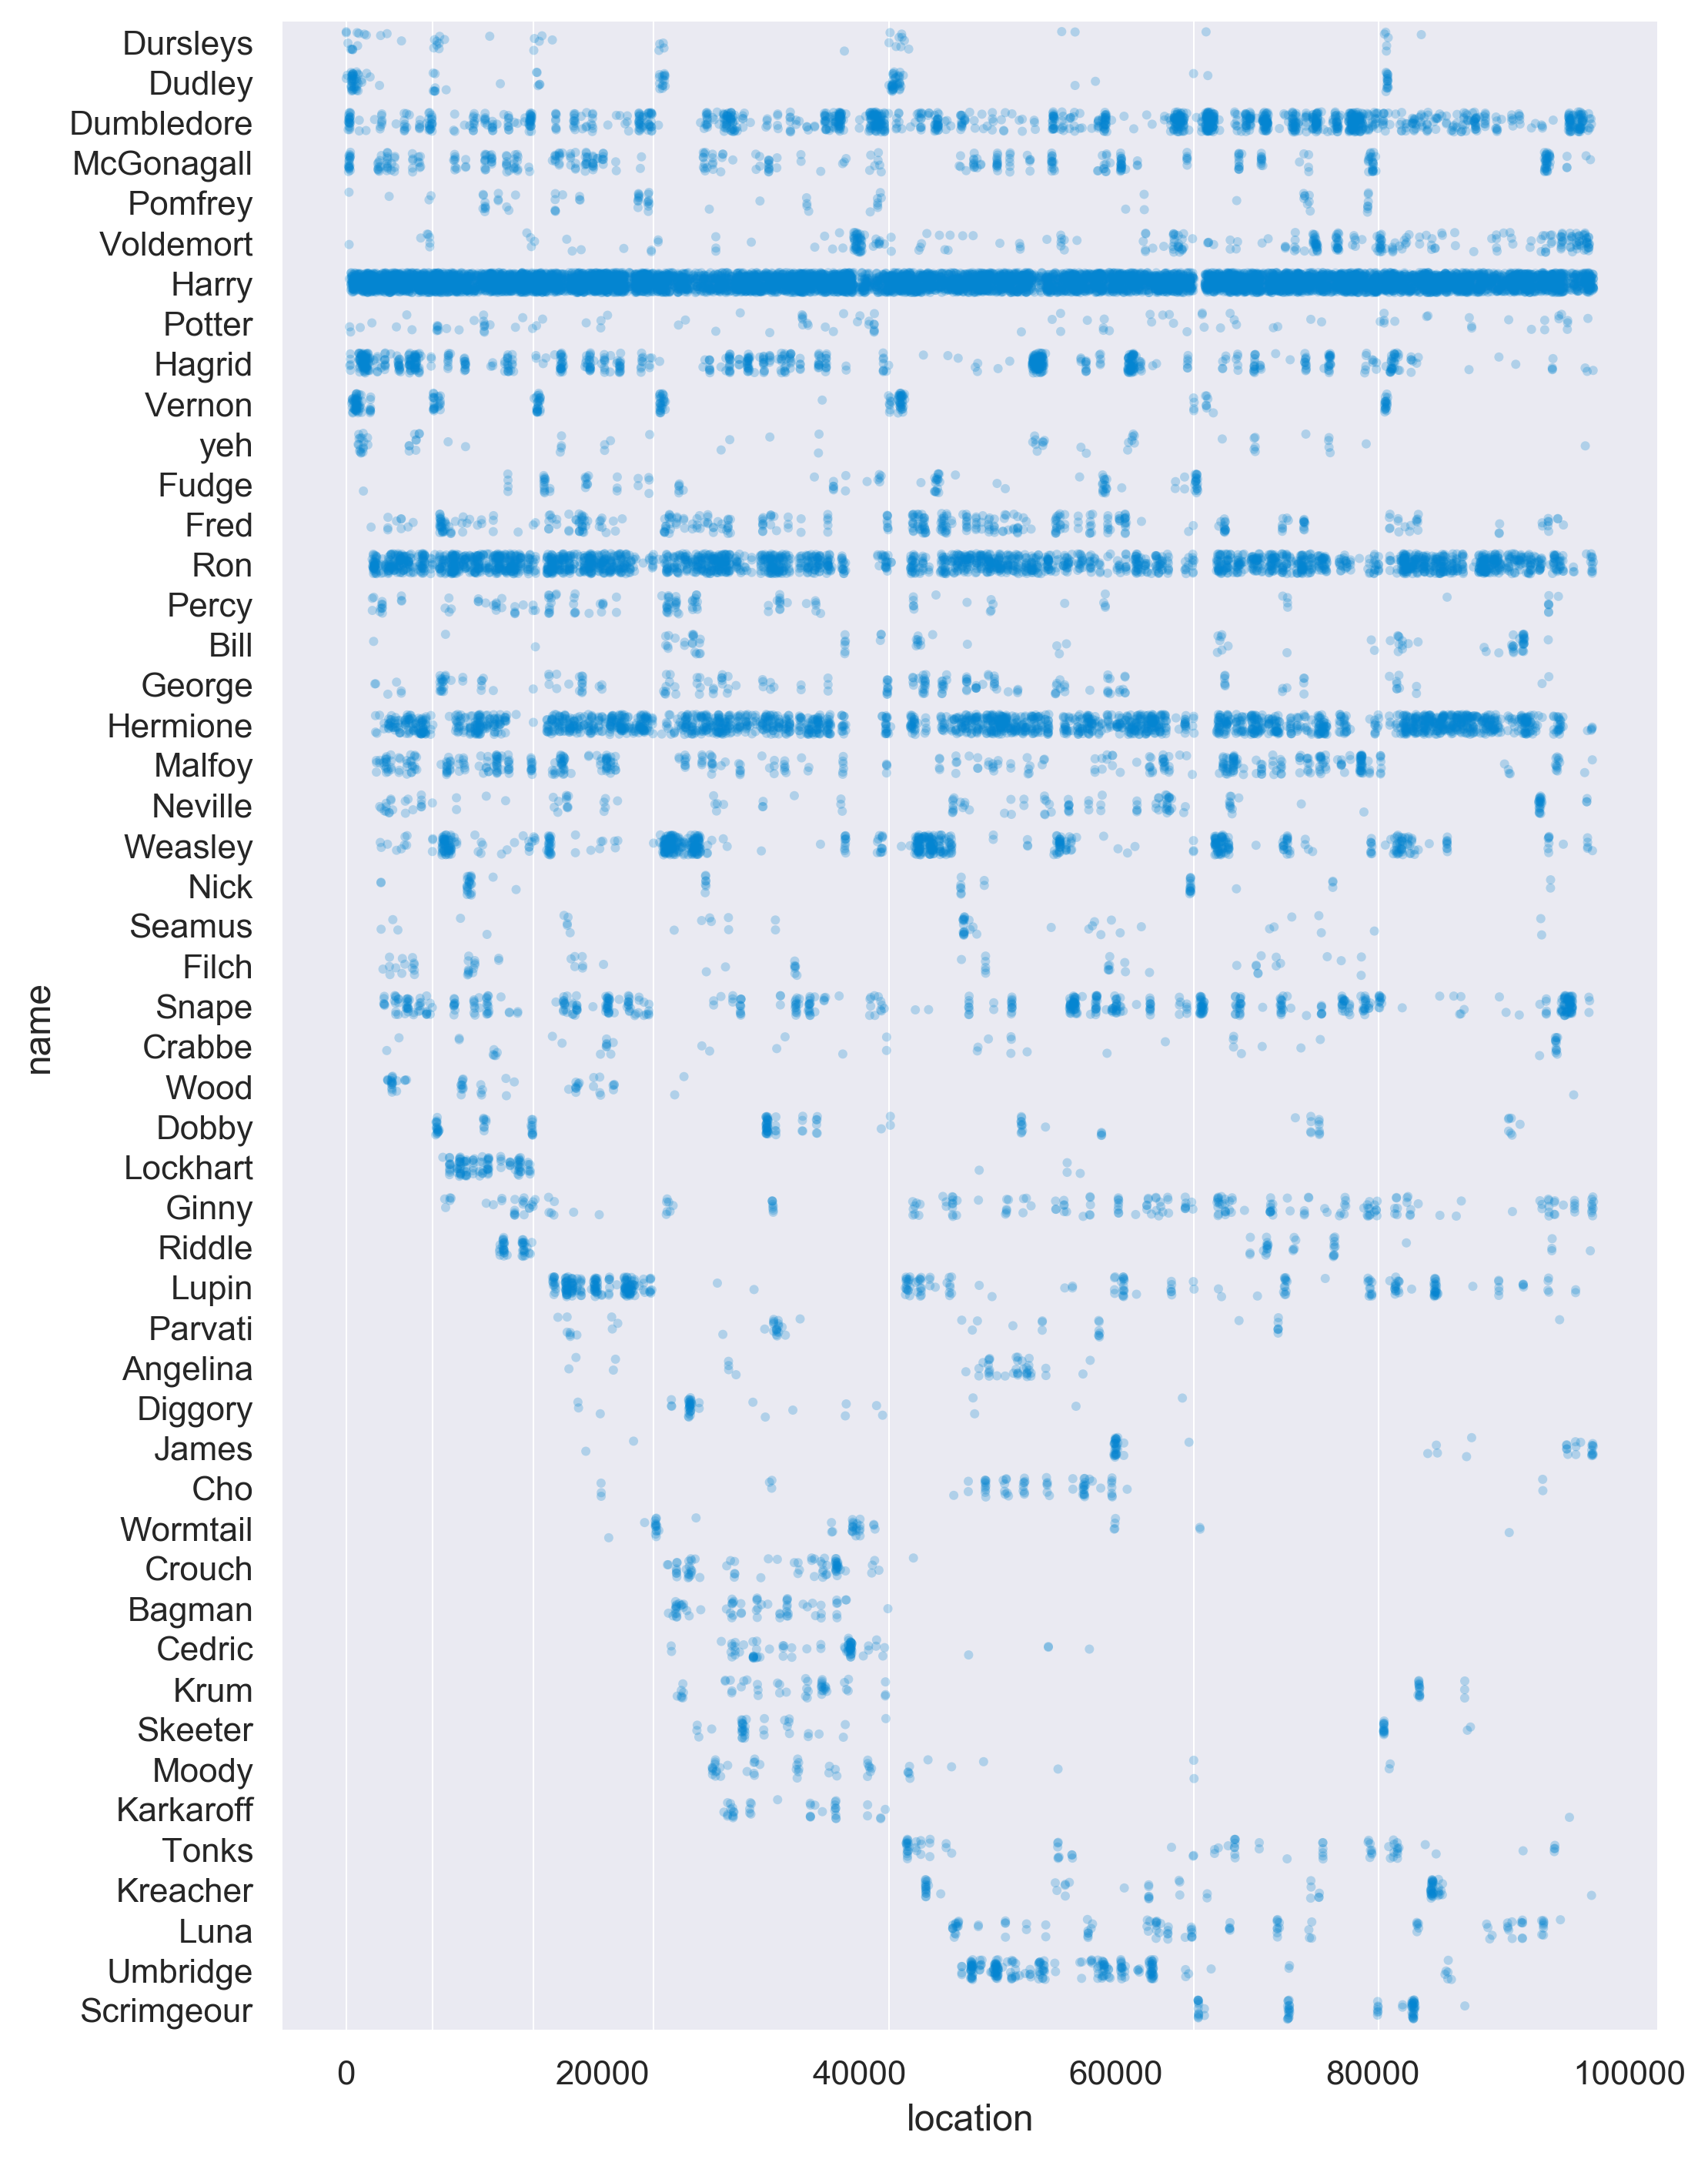

In [40]:
데이터를 그래프로 표시하면.. 여기서는 씨본으로 표시

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='dark')
most_frequent_actors = list(action_df['name'].value_counts().index[:50])
top_actors_df = action_df[action_df['name'].isin(most_frequent_actors)].copy()
book_locations = (pd.DataFrame(content_json)
                  .reset_index()
                  .groupby('book_id')['index']
                  .min()
                  .to_dict()
                 )
fig, ax = plt.subplots(figsize=(8,12), dpi=144*2)
sns.stripplot(x='location', y='name', 
              data=top_actors_df, ax=ax,
              color='xkcd:cerulean',
              size=3, alpha=0.25, jitter=0.25)
sns.despine(bottom=True, left=True)

for book, verse_num in book_locations.items():
    ax.axvline(verse_num, alpha=1, lw=0.5, color='w')

print("showing order before name combination")
print(" ")

이름(등장인물)이 전체 글의 위치에서 얼마나 많이 언급되었는지 확인하는 것 - 키워드 추출, 이름관의 관계를 알아내는 방법은 무엇인가???이것을 해결하자